In [24]:
import os
import glob
import torch
import cv2
from sklearn.model_selection import train_test_split
from torchvision import transforms
from torch.utils.data import DataLoader
from skimage.io import imread

from pipelines import train_model, test_model
from models import UNetResNet
from dataset import CustomDataset
from util import showImage, showImageRow, threshold
from criterion import weighted_loss
import torch.optim as optim


In [8]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [9]:
IMAGE_PATH = os.path.join("dataset", "shadow-images/")
LABEL_PATH = os.path.join("dataset", "shadow-labels")
ROWS, COLS = (256, 256)
EXT_JPG = "*.jpg"

In [10]:
image_paths = glob.glob(os.path.join(IMAGE_PATH, EXT_JPG))[:1000]
label_paths = glob.glob(os.path.join(LABEL_PATH, EXT_JPG))[:1000]

x_train_paths, x_test_paths, y_train_paths, y_test_paths = train_test_split(image_paths, label_paths, test_size=0.1)

print("Length of Training Data:", len(x_train_paths))
print("Length of Testing  Data:", len(x_test_paths))

Length of Training Data: 77
Length of Testing  Data: 9


In [11]:
data_transforms = {
    "image": transforms.Compose([transforms.ToTensor(), transforms.Resize((ROWS, COLS))]),
    "label": transforms.Compose([transforms.ToTensor(), transforms.Resize((ROWS, COLS))]),
}

BATCH_SIZE = 8

task3_datasets = {
    "train": CustomDataset(
        x_train_paths,
        y_train_paths,
        data_transforms["image"],
        data_transforms["label"],
    ),
    "val": CustomDataset(
        x_test_paths,
        y_test_paths,
        data_transforms["image"],
        data_transforms["label"],
    ),
}


dataloaders = {
    phase: DataLoader(task3_datasets[phase], BATCH_SIZE, shuffle=True, num_workers=0)
    for phase in ["train", "val"]
}


In [12]:
model = UNetResNet(34, 1, pretrained=True, is_deconv=True).to(device=device)
weights = torch.load("kaggle_weights2/best.pt")
model.load_state_dict(weights)

<All keys matched successfully>

In [13]:
EPOCHS = 20
LEARNING_RATE = 0.0001

In [14]:
import gc

gc.collect()

torch.cuda.empty_cache()

In [16]:
criterion = weighted_loss
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)

In [38]:
val_loss_history, train_loss_history = train_model(
    model, dataloaders, criterion, optimizer, device, num_epochs=EPOCHS
)


  0%|          | 0/20 [00:00<?, ?it/s]

Epoch 0 / 19	

  0%|          | 0/10 [00:00<?, ?it/s]

train loss: 0.7926	

  0%|          | 0/2 [00:00<?, ?it/s]

val loss: 0.4953	
Epoch 1 / 19	

  0%|          | 0/10 [00:00<?, ?it/s]

train loss: 0.4516	

  0%|          | 0/2 [00:00<?, ?it/s]

val loss: 0.4319	
Epoch 2 / 19	

  0%|          | 0/10 [00:00<?, ?it/s]

train loss: 0.3123	

  0%|          | 0/2 [00:00<?, ?it/s]

val loss: 0.3260	
Epoch 3 / 19	

  0%|          | 0/10 [00:00<?, ?it/s]

train loss: 0.1975	

  0%|          | 0/2 [00:00<?, ?it/s]

val loss: 0.2596	
Epoch 4 / 19	

  0%|          | 0/10 [00:00<?, ?it/s]

train loss: 0.1380	

  0%|          | 0/2 [00:00<?, ?it/s]

val loss: 0.3505	
Epoch 5 / 19	

  0%|          | 0/10 [00:00<?, ?it/s]

train loss: 0.0996	

  0%|          | 0/2 [00:00<?, ?it/s]

val loss: 0.3596	
Epoch 6 / 19	

  0%|          | 0/10 [00:00<?, ?it/s]

train loss: 0.0788	

  0%|          | 0/2 [00:00<?, ?it/s]

val loss: 0.3155	
Epoch 7 / 19	

  0%|          | 0/10 [00:00<?, ?it/s]

train loss: 0.0676	

  0%|          | 0/2 [00:00<?, ?it/s]

val loss: 0.3379	
Epoch 8 / 19	

  0%|          | 0/10 [00:00<?, ?it/s]

train loss: 0.0598	

  0%|          | 0/2 [00:00<?, ?it/s]

val loss: 0.3114	
Epoch 9 / 19	

  0%|          | 0/10 [00:00<?, ?it/s]

train loss: 0.0527	

  0%|          | 0/2 [00:00<?, ?it/s]

val loss: 0.3433	
Epoch 10 / 19	

  0%|          | 0/10 [00:00<?, ?it/s]

train loss: 0.0474	

  0%|          | 0/2 [00:00<?, ?it/s]

val loss: 0.3146	
Epoch 11 / 19	

  0%|          | 0/10 [00:00<?, ?it/s]

train loss: 0.0453	

  0%|          | 0/2 [00:00<?, ?it/s]

val loss: 0.3063	
Epoch 12 / 19	

  0%|          | 0/10 [00:00<?, ?it/s]

train loss: 0.0436	

  0%|          | 0/2 [00:00<?, ?it/s]

val loss: 0.3208	
Epoch 13 / 19	

  0%|          | 0/10 [00:00<?, ?it/s]

train loss: 0.0405	

  0%|          | 0/2 [00:00<?, ?it/s]

val loss: 0.3348	
Epoch 14 / 19	

  0%|          | 0/10 [00:00<?, ?it/s]

train loss: 0.0377	

  0%|          | 0/2 [00:00<?, ?it/s]

val loss: 0.3459	
Epoch 15 / 19	

  0%|          | 0/10 [00:00<?, ?it/s]

train loss: 0.0372	

  0%|          | 0/2 [00:00<?, ?it/s]

val loss: 0.2959	
Epoch 16 / 19	

  0%|          | 0/10 [00:00<?, ?it/s]

train loss: 0.0350	

  0%|          | 0/2 [00:00<?, ?it/s]

val loss: 0.3224	
Epoch 17 / 19	

  0%|          | 0/10 [00:00<?, ?it/s]

train loss: 0.0349	

  0%|          | 0/2 [00:00<?, ?it/s]

val loss: 0.2794	
Epoch 18 / 19	

  0%|          | 0/10 [00:00<?, ?it/s]

train loss: 0.0334	

  0%|          | 0/2 [00:00<?, ?it/s]

val loss: 0.2579	
Epoch 19 / 19	

  0%|          | 0/10 [00:00<?, ?it/s]

train loss: 0.0318	

  0%|          | 0/2 [00:00<?, ?it/s]

val loss: 0.3195	
------------------------------
Training Complete
Best Validation Loss: 0.2579


In [17]:
weights = torch.load("shadow_weights/best.pt")
model.load_state_dict(weights)  
model.eval()

test_paths = list(glob.glob("dataset/shadow-images/*.jpg"))[-5:]
label_paths = list(glob.glob("dataset/shadow-labels/*.jpg"))[-5:]


Input Image
Input Image


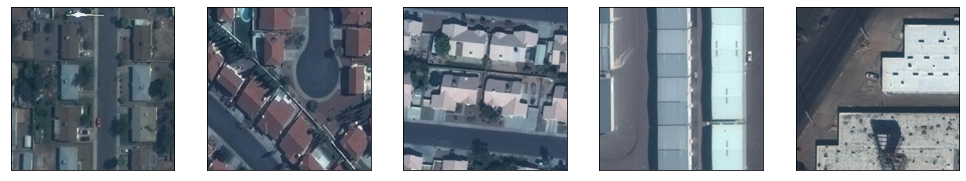

Predicted Segmentations


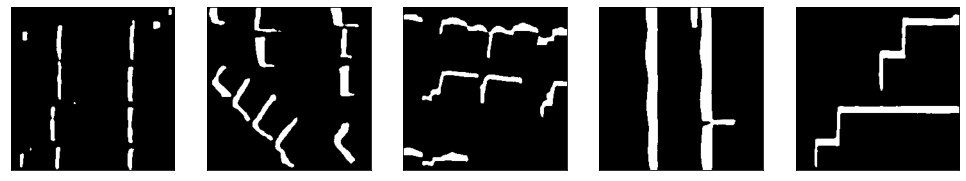

Ground Truth


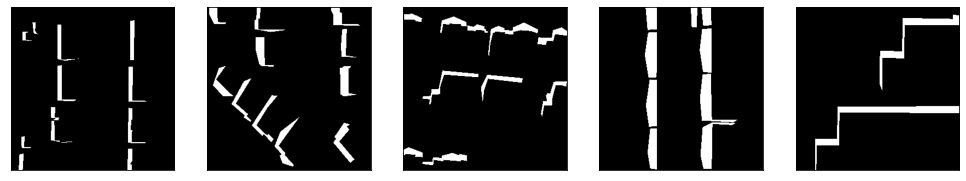

In [22]:
outputs = []
inputs = []
labels = []

for image_path, label_path in zip(test_paths, label_paths):
    image = cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB)
    inputs.append(cv2.resize(image, (ROWS, COLS)))
    image = data_transforms["image"](image).to(device=device)
    image = image.reshape(1, *image.shape)
    label = cv2.cvtColor(cv2.imread(label_path), cv2.COLOR_BGR2RGB)
    labels.append(label)
    output = torch.sigmoid(model(image))[0].permute(1, 2, 0).detach().cpu().numpy()
    output = cv2.merge((output, output, output))
    outputs.append(threshold(output, 0.3))

print("Input Image")

print("Input Image")
showImageRow(inputs)
print("Predicted Segmentations")
showImageRow(outputs)
print("Ground Truth")
showImageRow(labels)

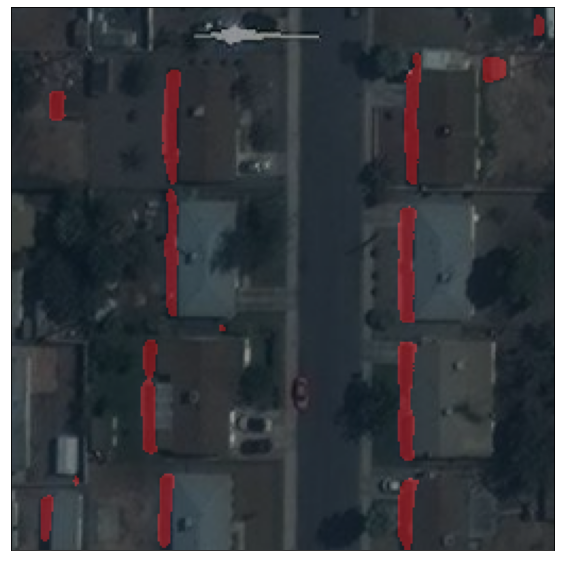

In [35]:
output = outputs[0].astype(np.uint8) * 255
image = inputs[0]

for i in range(output.shape[0]):
    for j in range(output.shape[0]): 
        if output[i][j][0] == 255: 
            output[i][j] = [255, 0, 0]

visual = cv2.addWeighted(output, 0.4, image, 0.6, 1)
showImage(visual)

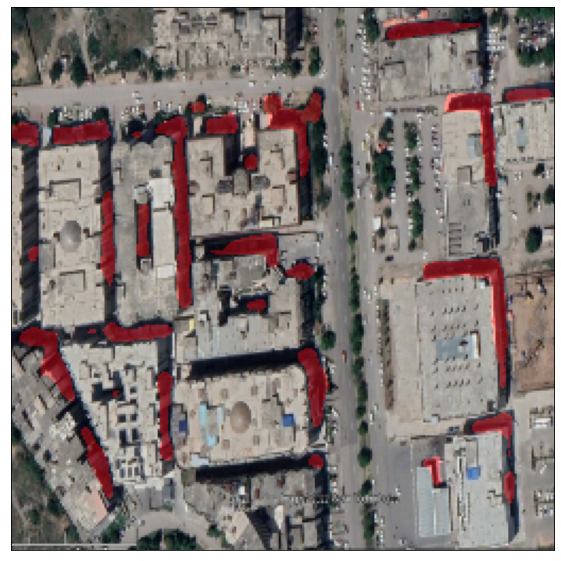

In [36]:
image = imread("lums_image/isb3.jpg")

output = data_transforms["image"](image).to(device=device)
output = output.reshape(1, *output.shape)
output = torch.sigmoid(model(output))
output = output[0].permute(1, 2, 0).detach().cpu().numpy()
output = cv2.merge((output, output, output))
output = threshold(output, 0.2)

output = output.astype(np.uint8) * 255

for i in range(output.shape[0]):
    for j in range(output.shape[0]): 
        if output[i][j][0] == 255: 
            output[i][j] = [255, 0, 0]


image = cv2.resize(image, (ROWS, COLS))
visual = cv2.addWeighted(image, 0.9, output, 0.4, 1)


showImage(visual)